##**Домашнее задание по теме "Центральная предельная теорема и статистика".**

**Задание:**

Домашнее задание доступно по ссылке:https://github.com/Netology-DS/MDS/blob/main/MDS-new/HW_9_upd.ipynb.

**Решение:**

В этом задании нужно убедиться, что ЦПТ действительно работает.

Создайте случайную величину из [любого выбранного вами распределения](https://docs.scipy.org/doc/scipy/reference/stats.html), для разных значений `n` сгенерируйте 1000 выборок размера `n`. Постройте гистрограммы средних этих выборок и сделайте выводы.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import gaussian_kde
import seaborn as sns
from scipy.stats import norm

In [ ]:
# Выберем экспоненциальное распределение
rv = sts.expon()
sample = rv.rvs(size=1000)

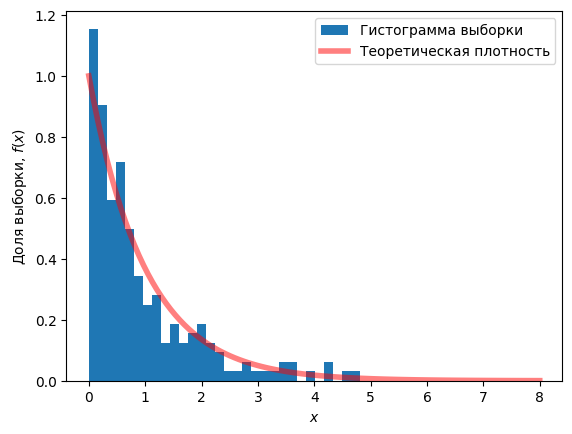

In [ ]:
# Визуализируем
x = np.linspace(0,8,100)
pdf = rv.pdf(x)
plt.hist(sample, density=True, bins=30, label='Гистограмма выборки')
plt.plot(x, pdf, label='Теоретическая плотность', color='red', lw=4, alpha=0.5)
plt.legend()
plt.ylabel('Доля выборки, $f(x)$')
plt.xlabel('$x$')
plt.show()

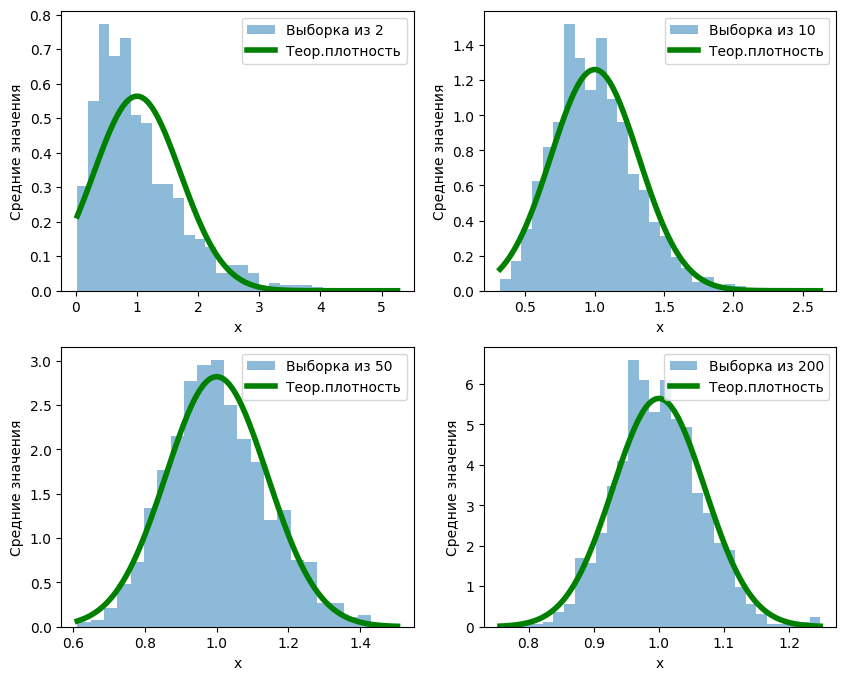

Статистика по всем выборкам:                 2            10           50           200
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      1.035508     1.001718     1.004245     0.998576
std       0.740687     0.303774     0.141041     0.067519
min       0.022307     0.317517     0.611165     0.756190
25%       0.502710     0.792954     0.907963     0.955517
50%       0.846157     0.984096     0.995575     0.994949
75%       1.385464     1.179618     1.094898     1.039833
max       5.260506     2.625925     1.504811     1.247894


In [ ]:
# Создадим визуализации для разных значений n
n_values = [2, 10, 50, 200]
data = {}
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i in range(len(n_values)):
    n = n_values[i]
    sample_means = np.array([])
    samples_count = 1000
    for number in range(samples_count):
        sample = rv.rvs(size=n)
        sample_means = np.append(sample_means, sample.mean())

    data[n] = sample_means

    label = 'Выборка из ' + str(n)
    axs.flat[i].hist(sample_means, bins='auto', density=True, label=label, alpha=0.5)
    axs.flat[i].legend()
    axs.flat[i].set_ylabel('Средние значения')
    axs.flat[i].set_xlabel('x')

    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    axs.flat[i].plot(x, sts.norm.pdf(x, loc=rv.mean(), scale=rv.std()/np.sqrt(n)), color='green', lw=4, label='Теор.плотность')
    axs.flat[i].legend()

plt.show()

df = pd.DataFrame(data)
sum = df.describe()
print("Статистика по всем выборкам: ", sum)


Визуализация позволяет сделать следующие выводы:
*   Среднее значение выборочного среднего приближается к математическому ожиданию исходного распределения по мере увеличения размера выборки. Распределение становится ближе к нормальному. Что подтверждает правило Центральной предельной теоремы.
*   Стандартное отклонение выборочного среднего уменьшается по мере увеличения размера выборки. То есть разброс становится меньше, а оцнка среднего - точнее.
*   Значения минимума и максимума выборочного среднего также приближаются к математическому ожиданию с увеличением размера выборки. Это означает, что с увеличением размера выборки значения среднего становятся более стабильными и менее случайными.
*   Значения перцентилей (25%, 50% и 75%) выборочного среднего также приближаются к математическому ожиданию исходного распределения с увеличением размера выборки.
Таким образом, результаты эксперимента подтверждают работу Центральной предельной теоремы и позволяют сделать вывод о том, что с увеличением размера выборки выборочное среднее становится более точной и стабильной оценкой среднего значения исходного распределения.